In [98]:
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lomapost import * #All functions defined within module lomapost
import h5py
from readfiles import *
%matplotlib inline

In [99]:
set_fig_props()

In [100]:
from IPython.display import clear_output
from IPython.display import Image

# Job selection

#### Modify p_folders vector for job selection:

In [101]:
p_s80Big1 = '/share/drive/toni/Re160s80/caseBig1/'
opt_s80Big1 = 1 #lomacte code opt value

p_s80a = '/share/drive/toni/Re160s80/case1/'
opt_lomacte = 1

p_s80ay2 = '/share/drive/toni/Re160s80/case1/y2/'
p_s80arv = '/share/drive/toni/Re160s80/case1/rv2/'#Low CFL cumtrpaz
p_s80arv = '/share/drive/toni/Re160s80/case1/rv/'#kahan and new family RK


p_s80ay2sig07 = '/share/drive/toni/Re160s80/case1/y2/sig07/'
p_s80ay2sig07Re380 = '/share/drive/toni/Re160s80/case1/y2/sig07/Re380/'
p_s80ay2sig07b = '/share/drive/toni/Re160s80/case1/y2/sig07/bigger/'
p_s80by2sig07 = '/share/drive/toni/Re160s80/case2/y2/sig07/'
p_s80cy2sig07 = '/share/drive/toni/Re160s80/case3/y2/sig07/'
opt_lomacte = 1

p_s20ay2 = '/share/drive/toni/Re160s20/case1/y2/'
p_s20by2 = '/share/drive/toni/Re160s20/case2/y2/'
p_s20cy2 = '/share/drive/toni/Re160s20/case3/y2/'
p_s40ay2 = '/share/drive/toni/Re160s40/case1/y2/'
opt_lomacte = 1
p_s40by2 = '/share/drive/toni/Re160s40/case2/y2/'
p_s40cy2 = '/share/drive/toni/Re160s40/case3/y2/'
p_s40c = '/share/drive/toni/Re160s40/case3/'
p_s40a = '/share/drive/toni/Re160s40/case1/'
p_s80by2 = '/share/drive/toni/Re160s80/case2/y2/'
opt_lomacte = 1
p_s80cy2 = '/share/drive/toni/Re160s80/case3/y2/'
opt_lomacte = 1

p_s40ay2sig07='/share/drive/toni/Re160s40/case1/y2/sig07/'
p_s40by2sig07='/share/drive/toni/Re160s40/case2/y2/sig07/'
p_s40cy2sig07='/share/drive/toni/Re160s40/case3/y2/sig07/'
opt_loma3 = 3
opt_lomahz=1
p_PantB = '/share/drive/toni/APS/PantB/'

p_s10aSS = '/share/drive/toni/Re160s10/case1/SS/'
p_s10bSS = '/share/drive/toni/Re160s10/case2/SS/'
p_s10cSS = '/share/drive/toni/Re160s10/case3/SS/'
p_s20aSS = '/share/drive/toni/Re160s20/case1/SS/'
p_s20bSS = '/share/drive/toni/Re160s20/case2/SS/'
p_s20cSS = '/share/drive/toni/Re160s20/case3/SS/'

p_folders   = ['/share/drive/toni/Re460s20/boxy2/CFL01/']
p_folders   = ['/share/drive/toni/s80/caseSS2/']
p_folders   = ['/share/drive/toni/s80/1D/']
p_folders   = ['/share/drive/toni/s80/1D/CFL05/']
p_folders   = ['/share/drive/toni/s80/1D/oldloma/CFL025/']
p_folders   = ['/share/drive/toni/s80/1D/loma3C/CFL1/']
p_folders   = ['/share/drive/toni/Re160s80/case1/y2B/']
p_folders   = ['/share/drive/toni/VDML/s80/02/','/share/drive/toni/VDML/s80/03/']
p_folders   = ['/share/drive/toni/VDML/s10/04/']
p_folders   = ['/share/drive/toni/VDML/s10/test/']
p_folders = ['/data2/toni/work/results/Re160s10/testny10nmax48/','/data2/toni/work/results/Re160s10/testny24nmax24/',\
            '/data2/toni/work/results/Re160s10/testny1/','/data2/toni/work/results/Re160s10/testny10/']
p_folders   = ['/share/drive/toni/VDML/s10/test/','/share/drive/toni/VDML/s10/test2/']
p_folders   = ['/share/drive/toni/VDML/s10/01/','/share/drive/toni/VDML/s10/02/','/share/drive/toni/VDML/s10/03/',\
              '/share/drive/toni/VDML/s10/04/newman/','/share/drive/toni/VDML/s10/05/','/share/drive/toni/VDML/s10/06/']
p_folders   = ['/share/drive/toni/VDML/s80/01/','/share/drive/toni/VDML/s80/02/','/share/drive/toni/VDML/s80/03/',\
              '/share/drive/toni/VDML/s80/04/']
p_folders   = ['/share/drive/toni/VDML/BM/1D/s40/']
#p_folders   = ['/share/drive/toni/VDML/s10/test/IC/','/share/drive/toni/VDML/s10/03/IC/']
#p_folders   = ['/share/drive/toni/VDML/s10/06/']
#p_folders   = ['/share/drive/toni/VDML/s10/test/']
#p_folders   = ['/share/drive/toni/VDML/s10/06/']
#p_folders   = [p_s20aSS,p_s20bSS,p_s20cSS]
#p_folders   = ['/share/drive/toni/VDML/s80/02/']
#define option and styles for sta reading
l_sta_opt = [3,3,3,3]
#p_folders   = [p_results+ 'tests80', p_results+'Re160s20my1101',p_results+'Re160s40my1101'] #Define path of folders
#Option 2:  p_folders   = glob.glob(p_results+'Re160*my1101') #use pattern to define them
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1])   
    #print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_spe_files[ijob][0],l_spe_files[ijob][-1])  

['/share/drive/toni/VDML/BM/1D/s40/']
job(1): 1st file = /share/drive/toni/VDML/BM/1D/s40/Re1000_01_001.sta, last file = /share/drive/toni/VDML/BM/1D/s40/Re10_01_023.sta


In [102]:
#Total number of files for every job
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
    #nfiles2[ijob] = len(l_spe_files[ijob])
print nfiles


[72]


# Read all data

### STA files

In [103]:
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])

# CREATE HDF5 WITH ALL STATS

In [104]:
#for every job in l_folders:
for ijob in range(njobs):
    print ijob
    #print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        #temp = workstaSCAL(fsta) #save the stats on the right place
        #temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)

0


In [105]:
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']

l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point

['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'rww', 'thep', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'rvv', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'ruv', 'ruu', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']


In [106]:
CHECK = True #Flag for activating plots

In [107]:
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
            if variable=='dmpoint2':
                vdmpoint2  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz
        

my=257
Writing alp = [ 0.125], for ijob = 0
Writing bet = [ 0.25], for ijob = 0
Writing Re = [ 1000.], for ijob = 0
Writing nacum = [1], for ijob = 0
Writing EPS
Writing Relambda
Writing dm
Writing dw
Writing rhoEPS
Writing dmpoint
Writing etamin
Writing time


In [108]:
print np.min(np.diff(vtime))
for i in range(len(vtime)-1):
    if (vtime[i+1]-vtime[i]<0.05):
        print "ifile=%s, time =%s"%(l_sta_files[0][i],vtime[i+1]-vtime[i])

-1494.68304908
ifile=/share/drive/toni/VDML/BM/1D/s40/Re1000_01_049.sta, time =-1494.68304908


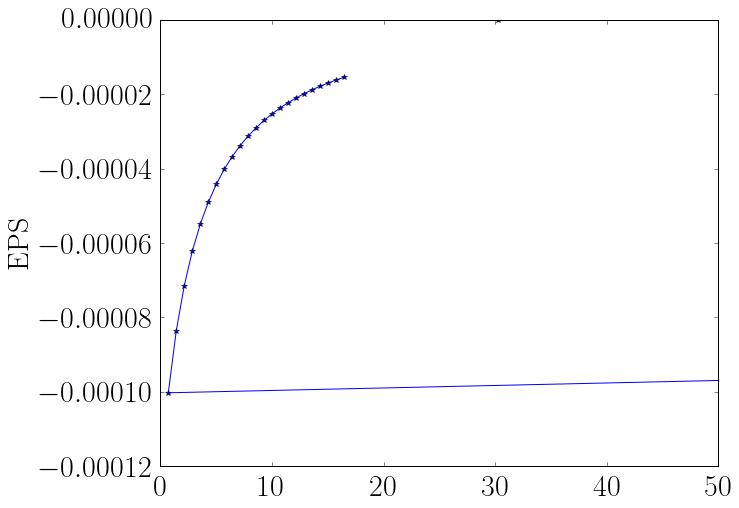

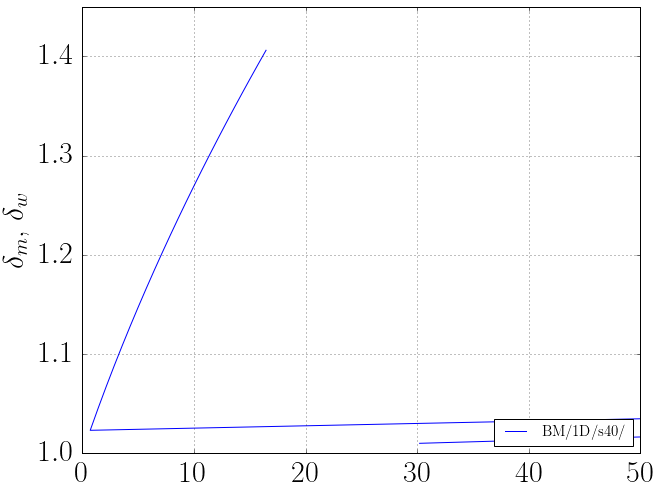

In [114]:
if CHECK==True:
    fig1 = plt.figure()
    fig2 = plt.figure()        
    ax2 = fig2.add_subplot(111)
    ax2.plot(vtime,vdm,'-',label=p_folders[ijob][-10:])
    #ax2.plot(vtime,vdw,'s')
    ax2.set_ylabel(r'$\delta_m$, $\delta_w$')
    plt.grid('on')
    plt.legend(loc=4,prop={'size':15})
        #Plots
    ax1 = fig1.add_subplot(111)
    ax1.plot(vtime,vEPS,'*-',label=p_folders[ijob][-10:])
    #ax1.plot(vtime,vdmpoint2,'s',label=p_folders[ijob][-10:])
        #ax1.plot(vtime,vLambda,label=p_folders[ijob][-10:])
    ax1.set_ylabel("EPS")
    #ax1.set_ylim(bottom=0)
    #ax1.set_ylim([0,0.007])
    plt.grid('on')
    ax2.set_xlim([0,50])
    ax1.set_xlim([0,50])
    plt.legend(loc=4,prop={'size':15})
    #plt.gca().set_ylim(bottom=0)
    

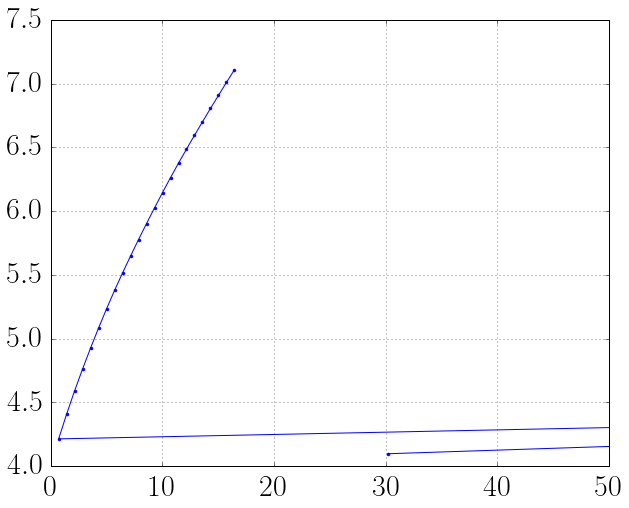

In [115]:
#plt.plot(vtime,vdmpoint,'b.-')
#plt.plot(vtime,vdmpoint2,'g')
#plt.plot(vtime,der1(vtime,vdm),'r.-')
plt.plot(vtime,vdw,'b.-')
#plt.ylim(bottom=0.0)
#plt.ylim(top=0.024)
#plt.xlim(left=0.0)
plt.xlim([0,50])
plt.grid('on')

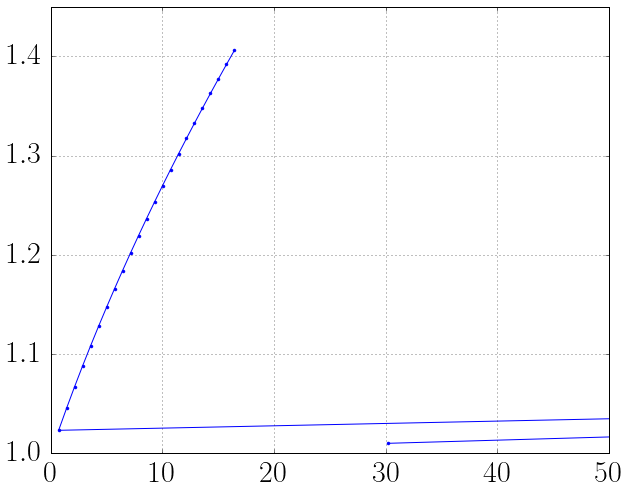

In [116]:
#plt.plot(vtime,der1(vtime,vdm),'r.-')
plt.plot(vtime,vdm,'b.-')
#plt.plot(vtime,vdmpoint2,'g')
#plt.ylim(bottom=0.0)
#plt.xlim(left=0.0)
plt.xlim([0,50])
plt.grid('on')